In [4]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times']

In [20]:
filter_method = 'ssplines'
system = 'VanderPol'
n_states = 2
noise_lvl = 0.1
## READ JSON FILE
filename = system+'_'+filter_method+'_lcurve_noise_'+str(noise_lvl)+'.json'
filepath = 'data_files/'+system+'/'+filter_method+'/'+filename
with open(filepath) as f:
  lcurve_dict = json.load(f)

In [21]:
##PLOTTING STYLES
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]

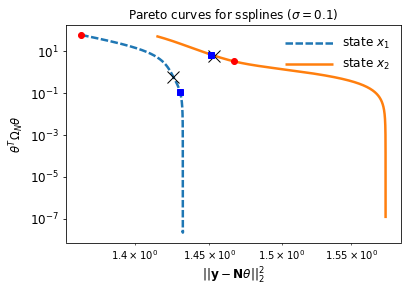

In [22]:
plt.close('all')
fig,ax = plt.subplots()


for state in range(n_states):

    res = lcurve_dict[f'state{state+1}:residual']
    reg = lcurve_dict[f'state{state+1}:regularizer']
    res_lc = lcurve_dict[f'state{state+1}:res_corner']
    reg_lc = lcurve_dict[f'state{state+1}:reg_corner']
    res_min = lcurve_dict[f'state{state+1}:res_min']
    reg_min = lcurve_dict[f'state{state+1}:reg_min']
    res_gcv = lcurve_dict[f'state{state+1}:res_gcv']
    reg_gcv = lcurve_dict[f'state{state+1}:reg_gcv']
    
    #Normalize
    
    
    ax.plot(res, reg, lw=2.5,dashes=dashesStyles[state%len(dashesStyles)],label=f'state $x_{state+1}$')
    ax.plot(res_min, reg_min,'kx', markersize = 12)
    ax.plot(res_gcv, reg_gcv, 'bs')
    ax.plot(res_lc, reg_lc, 'ro')
    
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel("$\\theta^T \Omega_N \\theta$", size = 11.5)
    ax.set_xlabel("$||\mathbf{y} - \mathbf{N}\\theta||_2^2$", size = 12)
    #ax.legend(frameon=False, loc='upper left',ncol=1,handlelength=2)
    ax.tick_params(labelsize = 12)
    ax.yaxis.tick_left()
    nameOfPlot = f"Pareto curves for ssplines ($\sigma = {noise_lvl}$)"
    ax.set_title(nameOfPlot, size = 12)
    ax.legend(frameon=False, loc='upper right',ncol=1,handlelength=4, fontsize = 12)

In [24]:
fig_format = 'svg'
filename = f'VanderPol_'+filter_method+'_lcurve_noise_'+str(noise_lvl).replace('.','d')+'.'+fig_format
fig.savefig(filename, format=fig_format, dpi=600)